<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Box Plots**


Estimated time needed: **45** minutes


In this lab, you will focus on the visualization of data. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize data composition and comparisons using box plots.


### Setup: Connecting to the Database


#### 1. Download the Database File


In [13]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite

--2025-03-10 15:00:33--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite
169.63.118.104ourses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 211415040 (202M) [application/octet-stream]
Saving to: ‘survey-results-public.sqlite.5’

survey-results-publ 100%[===================>] 201.62M  49.7MB/s    in 4.0s    

2025-03-10 15:00:39 (50.9 MB/s) - ‘survey-results-public.sqlite.5’ saved [211415040/211415040]



#### 2. Connect to the Database


**Install the needed libraries**


In [14]:
!pip install pandas
!pip install numpy

In [15]:
!pip install matplotlib

In [16]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the SQLite database
conn = sqlite3.connect('survey-results-public.sqlite')


## Demo: Basic SQL Queries


#### Demo 1: Count the Number of Rows in the Table


In [17]:
QUERY = "SELECT COUNT(*) FROM main"
df = pd.read_sql_query(QUERY, conn)
print(df)


   COUNT(*)
0     65437


#### Demo 2: List All Tables


In [18]:
QUERY = """
SELECT name as Table_Name 
FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


,Table_Name
0,main


#### Demo 3: Group Data by Age


In [19]:
QUERY = """
SELECT Age, COUNT(*) as count 
FROM main 
GROUP BY Age 
ORDER BY Age
"""
df_age = pd.read_sql_query(QUERY, conn)
print(df_age)


                  Age  count
0     18-24 years old  14098
1     25-34 years old  23911
2     35-44 years old  14942
3     45-54 years old   6249
4     55-64 years old   2575
5   65 years or older    772
6   Prefer not to say    322
7  Under 18 years old   2568


## Visualizing Data


### Task 1: Visualizing the Distribution of Data


**1. Box Plot of `CompTotal` (Total Compensation)**


Use a box plot to analyze the distribution and outliers in total compensation.


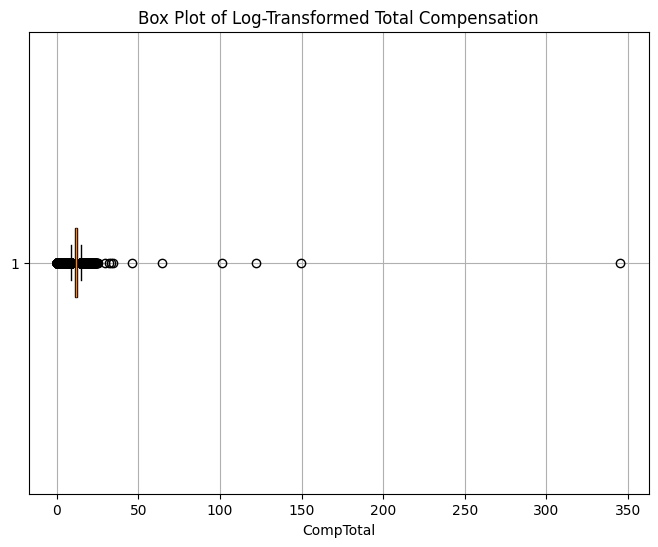

In [20]:
# your code goes here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

# SQL query to select only CompTotal
QUERY = """
SELECT CompTotal 
FROM main 
WHERE CompTotal IS NOT NULL
"""

# Assuming 'conn' is your database connection
df_CompTotal = pd.read_sql_query(QUERY, conn)

# Apply log transformation to CompTotal to handle wide range of values
df_CompTotal['LogCompTotal'] = np.log1p(df_CompTotal['CompTotal'])

# Plot the box plot for log-transformed CompTotal
plt.figure(figsize=(8, 6))
plt.boxplot(df_CompTotal['LogCompTotal'].dropna(), vert=False, patch_artist=True)

# Set x-axis to display whole numbers
plt.gca().xaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))

plt.title('Box Plot of Log-Transformed Total Compensation')
plt.xlabel('CompTotal')
plt.grid(True)
plt.show()


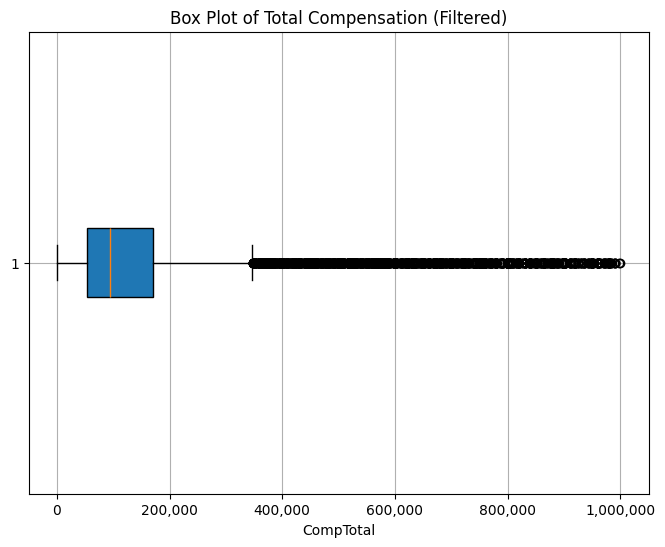

In [21]:
# your code goes here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

# SQL query to select only CompTotal
QUERY = """
SELECT CompTotal 
FROM main 
WHERE CompTotal IS NOT NULL
"""

# Assuming 'conn' is your database connection
df_CompTotal = pd.read_sql_query(QUERY, conn)

# Filter out extreme outliers for a clearer box plot
filtered_df_CompTotal = df_CompTotal[df_CompTotal['CompTotal'] < 1e6]  # Adjust the threshold as needed

# Plot the box plot for filtered CompTotal
plt.figure(figsize=(8, 6))
plt.boxplot(filtered_df_CompTotal['CompTotal'].dropna(), vert=False, patch_artist=True)

# Set x-axis to display whole numbers
plt.gca().xaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))

plt.title('Box Plot of Total Compensation (Filtered)')
plt.xlabel('CompTotal')
plt.grid(True)
plt.show()


**2. Box Plot of Age (converted to numeric values)**


Convert the `Age` column into numerical values and visualize the distribution.


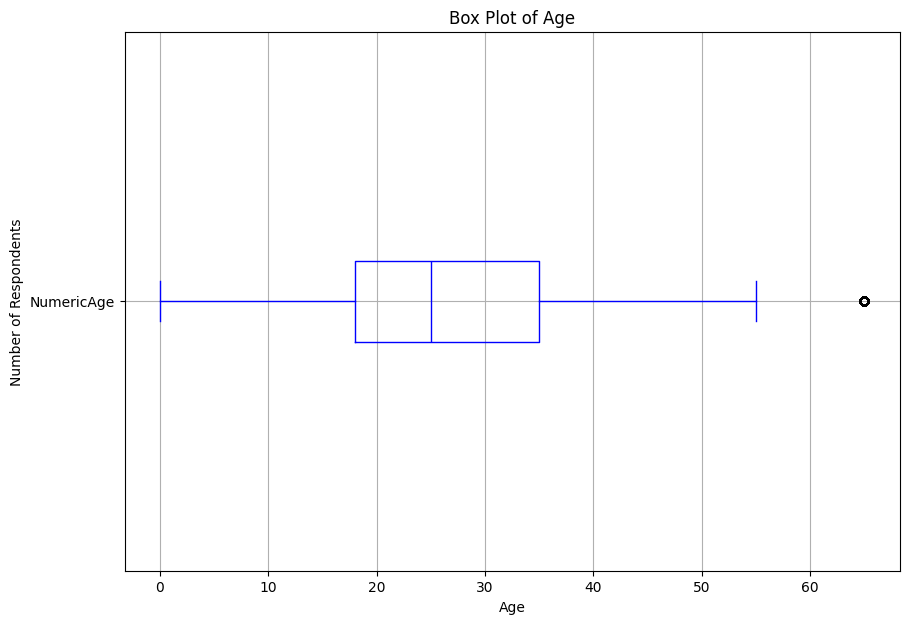

In [22]:
# your code goes here

import pandas as pd
import matplotlib.pyplot as plt

# Corrected SQL query to convert age to numeric values
QUERY = """
SELECT
     CASE 
         WHEN Age = 'Under 18 years old' THEN 0
         WHEN Age = 'Prefer not to say' THEN NULL
         WHEN Age <= 24 THEN 18
         WHEN Age <= 34 THEN 25
         WHEN Age <= 44 THEN 35
         WHEN Age <= 54 THEN 45
         WHEN Age <= 64 THEN 55
         WHEN Age >= 65 THEN 65
         ELSE 0
    END AS NumericAge
FROM main
WHERE Age IS NOT NULL
"""

# Fetch the data into a DataFrame
df_age = pd.read_sql_query(QUERY, conn)

# Ensure NumericAge is numeric
df_age['NumericAge'] = pd.to_numeric(df_age['NumericAge'], errors='coerce')

# Plotting the box plot
df_age.plot(kind='box', y='NumericAge', figsize=(10, 7), color='blue', vert=False)

# Adding title and labels
plt.title('Box Plot of Age')
plt.xlabel('Age')
plt.ylabel('Number of Respondents')
plt.grid(True)

# Display the plot
plt.show()


### Task 2: Visualizing Relationships in Data


**1. Box Plot of `CompTotal` Grouped by Age Groups:**


Visualize the distribution of compensation across different age groups.


<class 'pandas.core.frame.DataFrame'>
Index: 24086 entries, 1 to 33739
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   NumericAge  24074 non-null  float64 
 1   CompTotal   24086 non-null  float64 
 2   AgeGroup    24004 non-null  category
dtypes: category(1), float64(2)
memory usage: 588.3 KB
None
   NumericAge  CompTotal AgeGroup
1        25.0    28000.0    25-34
2        35.0    85000.0    35-44
3        35.0    50000.0    35-44
4        25.0   110000.0    25-34
5        35.0   126420.0    35-44


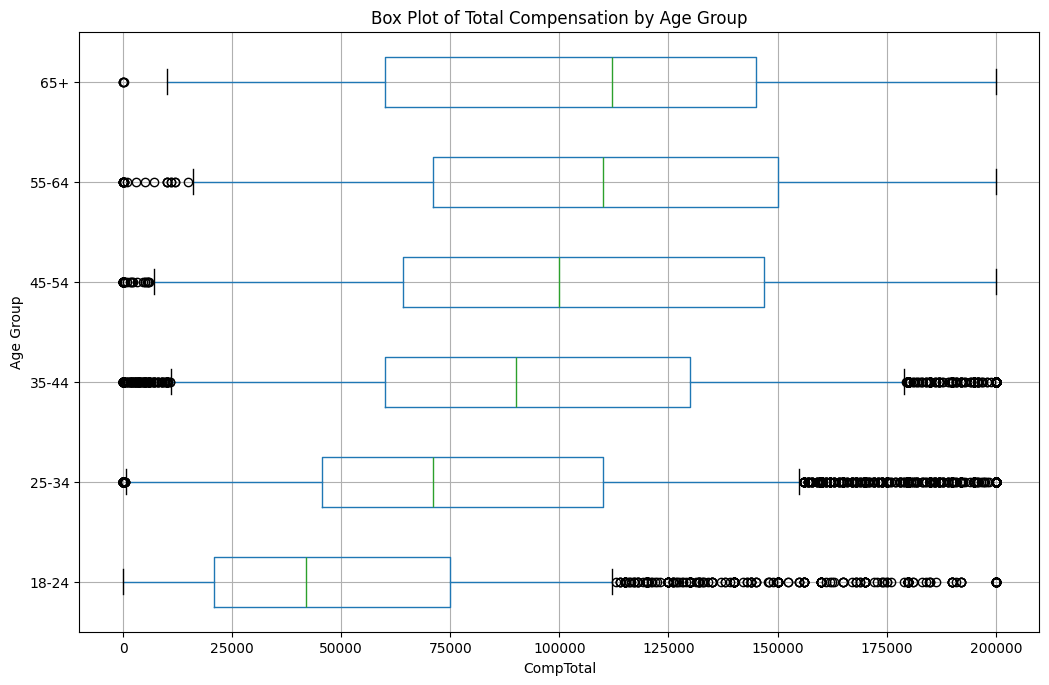

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Corrected SQL query to convert age to numeric values
QUERY = """
SELECT
     CASE 
         WHEN Age = 'Under 18 years old' THEN 0
         WHEN Age = 'Prefer not to say' THEN NULL
         WHEN Age <= 24 THEN 18
         WHEN Age <= 34 THEN 25
         WHEN Age <= 44 THEN 35
         WHEN Age <= 54 THEN 45
         WHEN Age <= 64 THEN 55
         WHEN Age >= 65 THEN 65
         ELSE 0
    END AS NumericAge, CompTotal
FROM main
WHERE CompTotal IS NOT NULL
"""

# Fetch the data into a DataFrame
df_comptotal_age = pd.read_sql_query(QUERY, conn)

# Convert NumericAge to age categories
def age_group(numeric_age):
    if numeric_age == 0:
        return 'Under 18'
    elif numeric_age == 18:
        return '18-24'
    elif numeric_age == 25:
        return '25-34'
    elif numeric_age == 35:
        return '35-44'
    elif numeric_age == 45:
        return '45-54'
    elif numeric_age == 55:
        return '55-64'
    elif numeric_age == 65:
        return '65+'
    else:
        return 'Unknown'

df_comptotal_age['AgeGroup'] = df_comptotal_age['NumericAge'].apply(age_group)

# Define age categories
age_categories = ['18-24', '25-34', '35-44', '45-54', '55-64', '65+']

# Convert AgeGroup to a categorical type with order
df_comptotal_age['AgeGroup'] = pd.Categorical(df_comptotal_age['AgeGroup'], categories=age_categories, ordered=True)

# Set an upper limit for CompTotal to remove extreme values (e.g., 200,000)
upper_limit = 2e5
df_comptotal_age = df_comptotal_age[df_comptotal_age['CompTotal'] <= upper_limit]

# Check the data
print(df_comptotal_age.info())
print(df_comptotal_age.head())

# Plotting the box plot grouped by AgeGroup
df_comptotal_age.boxplot(column='CompTotal', by='AgeGroup', figsize=(12, 8), vert=False, whis=0.7, showfliers=True)

# Adding title and labels
plt.title('Box Plot of Total Compensation by Age Group')
plt.suptitle('')  # Remove the default suptitle
plt.xlabel('CompTotal')
plt.ylabel('Age Group')
plt.grid(True)

# Display the plot
plt.show()


**2. Box Plot of `CompTotal` Grouped by Job Satisfaction (`JobSatPoints_6`):**


Examine how compensation varies based on job satisfaction levels.


/tmp/ipykernel_462/3208708522.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


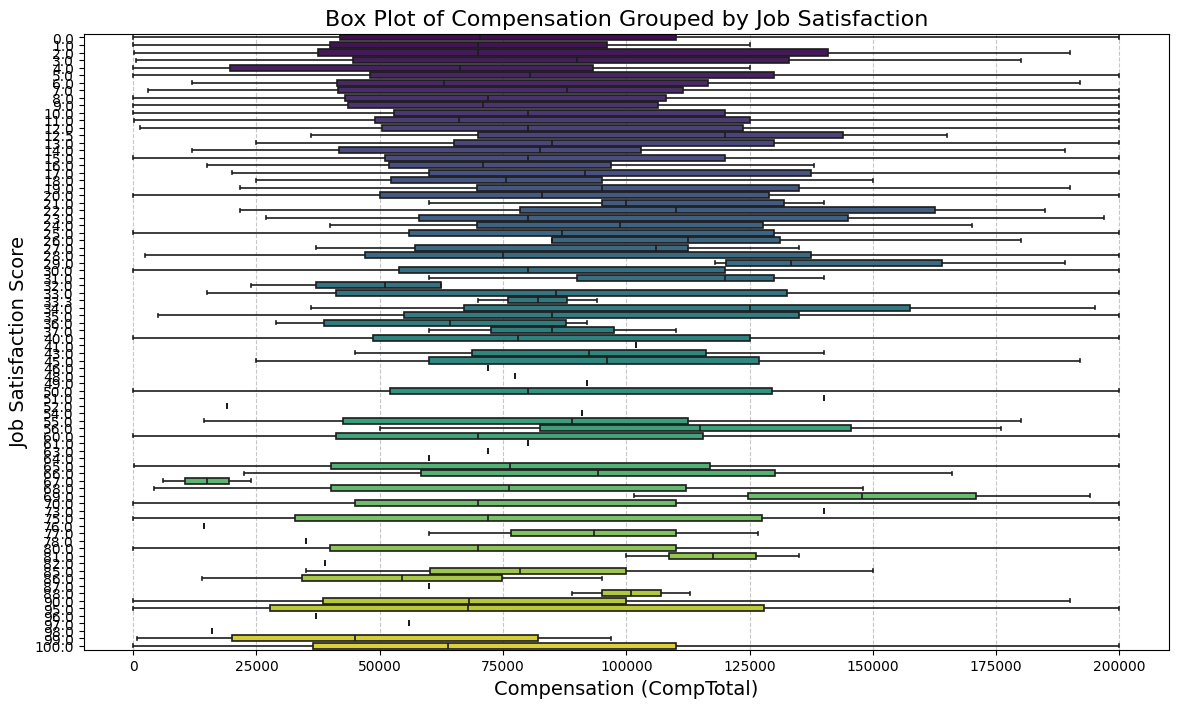

In [28]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Connect to SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Query data
QUERY = """
SELECT CompTotal, JobSatPoints_6
FROM main
WHERE CompTotal IS NOT NULL AND JobSatPoints_6 IS NOT NULL
"""
df_comptotal_jobsat = pd.read_sql_query(QUERY, conn)
conn.close()

# Set an upper limit for `CompTotal` to remove extreme values (e.g., 200,000)
upper_limit = 200000
df_comptotal_jobsat = df_comptotal_jobsat[df_comptotal_jobsat['CompTotal'] <= upper_limit]

# Convert JobSatPoints_6 to categorical and sort it
df_comptotal_jobsat['JobSatPoints_6'] = pd.Categorical(df_comptotal_jobsat['JobSatPoints_6'])
df_comptotal_jobsat = df_comptotal_jobsat.sort_values(by='JobSatPoints_6')

# 📊 Improved Box Plot
plt.figure(figsize=(14, 8))
sns.boxplot(
    data=df_comptotal_jobsat, 
    x="CompTotal", 
    y="JobSatPoints_6", 
    palette="viridis",  # Using a different color palette for clarity
    showfliers=False,    # Hide extreme outliers
    linewidth=1.2
)

# 🎨 Enhancing Readability
plt.title("Box Plot of Compensation Grouped by Job Satisfaction", fontsize=16)
plt.xlabel("Compensation (CompTotal)", fontsize=14)
plt.ylabel("Job Satisfaction Score", fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)  # Grid for better

### Task 3: Visualizing the Composition of Data


**1. Box Plot of `ConvertedCompYearly` for the Top 5 Developer Types:**


Analyze compensation across the top 5 developer roles.


<Figure size 1200x800 with 0 Axes>

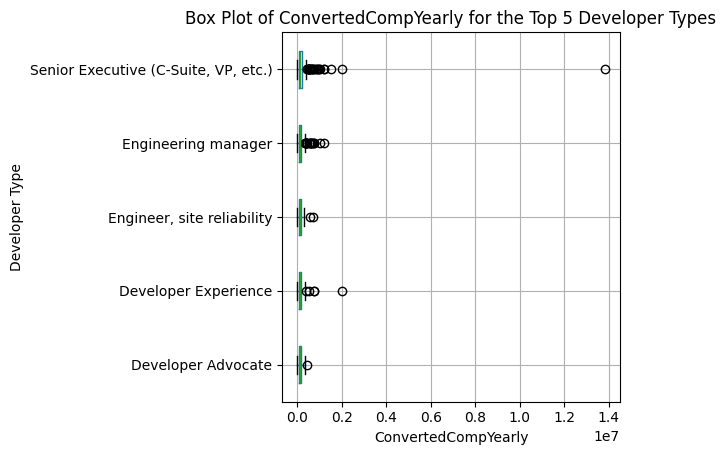

In [29]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Define the SQL query to select the DevType and ConvertedCompYearly columns
query = """
SELECT DevType, ConvertedCompYearly
FROM main
WHERE ConvertedCompYearly IS NOT NULL
"""

# Execute the SQL query and load the results into a DataFrame
df = pd.read_sql_query(query, conn)

# Calculate the median compensation for each developer type
median_comp = df.groupby('DevType')['ConvertedCompYearly'].median().reset_index()

# Sort by median compensation and get the top 5 developer types
top_5_developers = median_comp.sort_values(by='ConvertedCompYearly', ascending=False).head(5)['DevType']

# Filter the data for the top 5 developer types
df_topdeveloper = df[df['DevType'].isin(top_5_developers)]

# Plotting the box plot grouped by DevType
plt.figure(figsize=(12, 8))
df_topdeveloper.boxplot(column='ConvertedCompYearly', by='DevType', vert=False, whis=1.7, showfliers=True)

# Adding title and labels
plt.title('Box Plot of ConvertedCompYearly for the Top 5 Developer Types')
plt.suptitle('')  # Remove the default suptitle
plt.xlabel('ConvertedCompYearly')
plt.ylabel('Developer Type')
plt.grid(True)
plt.tight_layout()

# Display the plot
plt.show()


**2. Box Plot of `CompTotal` for the Top 5 Countries:**


Analyze compensation across respondents from the top 5 countries.


<Figure size 1200x800 with 0 Axes>

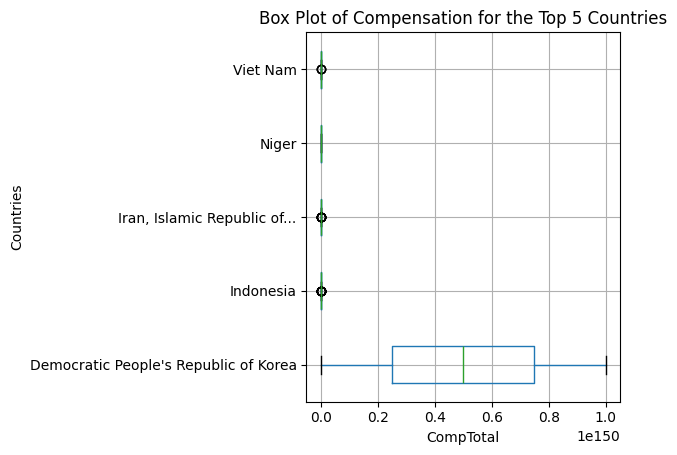

In [30]:
# your code goes here
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Define the SQL query to select the DevType and ConvertedCompYearly columns
query = """
SELECT Country, CompTotal
FROM main
WHERE CompTotal IS NOT NULL
"""

# Execute the SQL query and load the results into a DataFrame
df = pd.read_sql_query(query, conn)

# Calculate the median compensation for each developer type
median_comp = df.groupby('Country')['CompTotal'].median().reset_index()

# Sort by median compensation and get the top 5 developer types
top_5_countries = median_comp.sort_values(by='CompTotal', ascending=False).head(5)['Country']

# Filter the data for the top 5 countries types
df_countries = df[df['Country'].isin(top_5_countries)]

# Plotting the box plot grouped by Countries
plt.figure(figsize=(12, 8))
df_countries.boxplot(column='CompTotal', by='Country', vert=False, whis=1.7, showfliers=True)

# Adding title and labels
plt.title('Box Plot of Compensation for the Top 5 Countries')
plt.suptitle('')  # Remove the default suptitle
plt.xlabel('CompTotal')
plt.ylabel('Countries')
plt.grid(True)
plt.tight_layout()

# Display the plot
plt.show()


### Task 4: Visualizing Comparison of Data


**1. Box Plot of CompTotal Across Employment Types:**


Analyze compensation for different employment types.


/opt/conda/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Figure size 2000x1200 with 0 Axes>

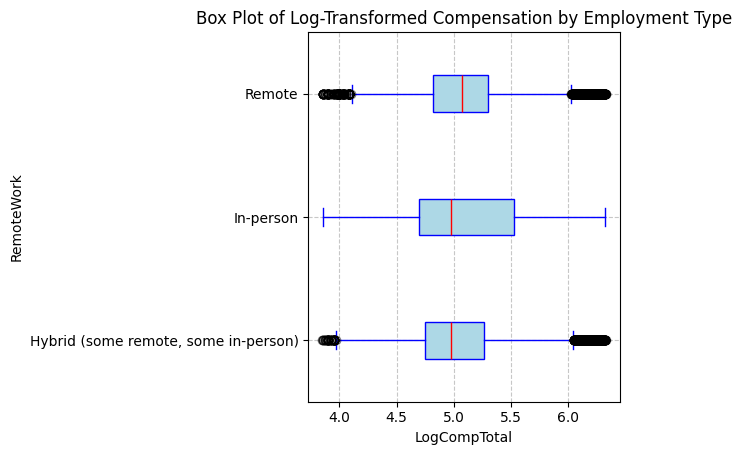

In [31]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Connect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Define the SQL query to select the RemoteWork and CompTotal columns
query = """
SELECT RemoteWork, CompTotal
FROM main
WHERE CompTotal IS NOT NULL
"""

# Execute the SQL query and load the results into a DataFrame
df = pd.read_sql_query(query, conn)

# Apply log transformation to CompTotal to handle the wide range of values
df['LogCompTotal'] = np.log10(df['CompTotal'])

# Remove outliers using the IQR method
Q1 = df['LogCompTotal'].quantile(0.25)
Q3 = df['LogCompTotal'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['LogCompTotal'] >= lower_bound) & (df['LogCompTotal'] <= upper_bound)]

# Plotting the box plot grouped by RemoteWork with enhancements
plt.figure(figsize=(20, 12))
df.boxplot(column='LogCompTotal', by='RemoteWork', vert=False, whis=1.5, showfliers=True, patch_artist=True,
           boxprops=dict(facecolor='lightblue', color='blue'),
           capprops=dict(color='blue'),
           whiskerprops=dict(color='blue'),
           flierprops=dict(marker='o', color='red', alpha=0.5),
           medianprops=dict(color='red'))

# Adding title and labels
plt.title('Box Plot of Log-Transformed Compensation by Employment Type')
plt.suptitle('')  # Remove the default suptitle
plt.xlabel('LogCompTotal')
plt.ylabel('RemoteWork')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

# Display the plot
plt.show()


**2. Box Plot of `YearsCodePro` by Job Satisfaction (`JobSatPoints_6`):**


Examine the distribution of professional coding years by job satisfaction levels.


<Figure size 1200x800 with 0 Axes>

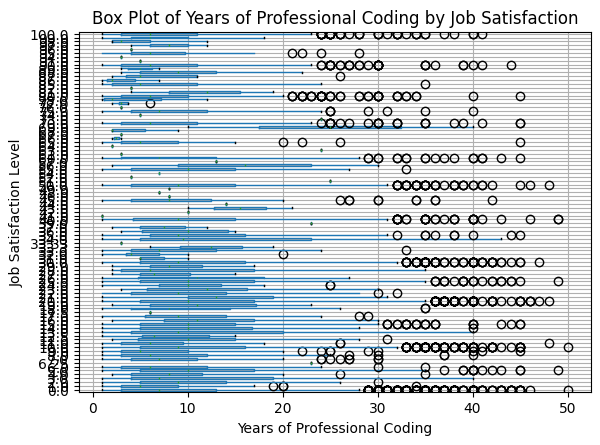

In [32]:
# your code goes here
import pandas as pd
import matplotlib.pyplot as plt

# SQL query to select YearsCodePro and JobSatPoints_6
QUERY = """
SELECT YearsCodePro, JobSatPoints_6
FROM main
WHERE YearsCodePro IS NOT NULL AND JobSatPoints_6 IS NOT NULL
"""

# Fetch the data into a DataFrame
df_years_code = pd.read_sql_query(QUERY, conn)

# Convert YearsCodePro to numeric if necessary
df_years_code['YearsCodePro'] = pd.to_numeric(df_years_code['YearsCodePro'], errors='coerce')

# Plotting the box plot grouped by JobSatPoints_6
plt.figure(figsize=(12, 8))
df_years_code.boxplot(column='YearsCodePro', by='JobSatPoints_6', vert=False, whis=1.5, showfliers=True)

# Adding title and labels
plt.title('Box Plot of Years of Professional Coding by Job Satisfaction')
plt.suptitle('')  # Remove the default suptitle
plt.xlabel('Years of Professional Coding')
plt.ylabel('Job Satisfaction Level')
plt.grid(True)

# Display the plot
plt.show()

### Final Step: Close the Database Connection


After completing the lab, close the connection to the SQLite database:


In [33]:
conn.close()
print("close")

close


## Summary


In this lab, you used box plots to visualize various aspects of the dataset, focusing on:

- Visualize distributions of compensation and age.

- Explore relationships between compensation, job satisfaction, and professional coding experience.

- Analyze data composition across developer roles and countries.

- Compare compensation across employment types and satisfaction levels.

Box plots provided clear insights into the spread, outliers, and central tendencies of various features in the dataset.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-07|1.2|Madhusudan Moole|Reviewed and updated lab|                                                                                      
|2024-10-06|1.0|Raghul Ramesh|Created lab|-->


Copyright © IBM Corporation. All rights reserved.
